In [3]:
%matplotlib inline


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sb

plt.rcParams['figure.figsize'] = 8, 4

In [5]:
df = pd.read_json(open('D:/Praxis Class Materials/Term 3/Data Visualization/Project/nobel_winners_cleaned.json'))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
award_age         858 non-null int64
category          858 non-null object
country           858 non-null object
date_of_birth     858 non-null object
date_of_death     559 non-null object
gender            858 non-null object
link              858 non-null object
name              858 non-null object
place_of_birth    831 non-null object
place_of_death    524 non-null object
text              858 non-null object
year              858 non-null int64
dtypes: int64(2), object(10)
memory usage: 80.5+ KB


In [7]:
# convert the date columns to a usable form
df.date_of_birth = pd.to_datetime(df.date_of_birth)
df.date_of_death = pd.to_datetime(df.date_of_death)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 12 columns):
award_age         858 non-null int64
category          858 non-null object
country           858 non-null object
date_of_birth     858 non-null datetime64[ns]
date_of_death     559 non-null datetime64[ns]
gender            858 non-null object
link              858 non-null object
name              858 non-null object
place_of_birth    831 non-null object
place_of_death    524 non-null object
text              858 non-null object
year              858 non-null int64
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 80.5+ KB


In [9]:
by_gender = df.groupby('gender')

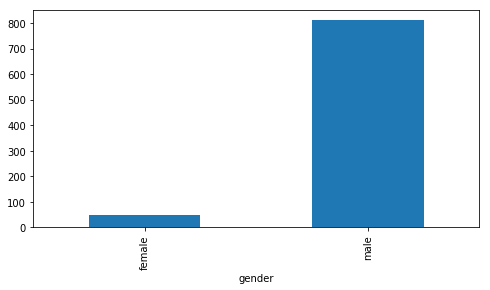

In [10]:
by_gender.size().plot(kind='bar')

In [11]:
by_gender.size()

gender
female     47
male      811
dtype: int64

In [12]:

by_cat_gen = df.groupby(['category', 'gender'])
by_cat_gen.get_group(('Physics', 'female'))[['name', 'year']]

,name,year
267,Maria Goeppert-Mayer,1963
614,Marie Skłodowska-Curie,1903


In [13]:
by_cat_gen.size()

category                gender
Chemistry               female      4
                        male      167
Economics               female      1
                        male       74
Literature              female     13
                        male       93
Peace                   female     16
                        male       87
Physics                 female      2
                        male      199
Physiology or Medicine  female     11
                        male      191
dtype: int64

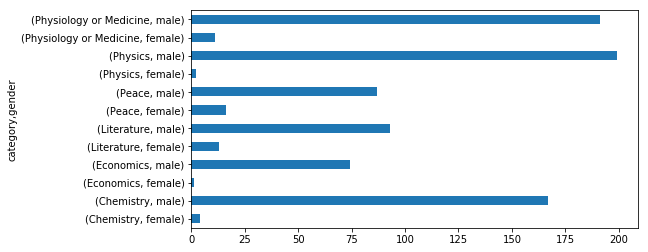

In [14]:

by_cat_gen.size().plot(kind='barh')

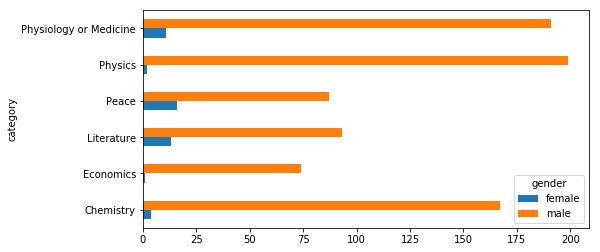

In [15]:
by_cat_gen.size().unstack().plot(kind='barh')

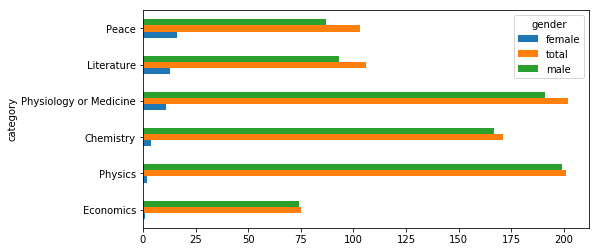

In [16]:
cat_gen_sz = by_cat_gen.size().unstack()
cat_gen_sz['total'] = cat_gen_sz.sum(axis=1)
cat_gen_sz = cat_gen_sz.sort_values(by='female', ascending=True)
cat_gen_sz[['female', 'total', 'male']].plot(kind='barh')

In [17]:

df[(df.category == 'Physics') & (df.gender == 'female')]\
[['name', 'country','year']]

,name,country,year
267,Maria Goeppert-Mayer,United States,1963
614,Marie Skłodowska-Curie,Poland,1903


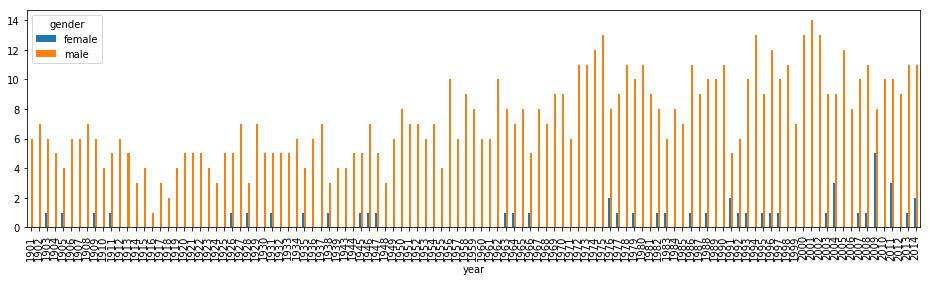

In [18]:
by_year_gender = df.groupby(['year','gender'])
year_gen_sz = by_year_gender.size().unstack()
year_gen_sz.plot(kind='bar', figsize=(16,4))

In [19]:

def thin_xticks(ax, tick_gap=10, rotation=45):
    """ Thin x-ticks and adjust rotation """
    ticks = ax.xaxis.get_ticklocs()
    ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
    ax.xaxis.set_ticks(ticks[::tick_gap])
    ax.xaxis.set_ticklabels(ticklabels[::tick_gap], rotation=rotation)
    ax.figure.show()

In [20]:
by_year_gender = df.groupby(['year', 'gender'])
by_year_gender.size().unstack()

gender,female,male
year,,
1901,NaN,6.0
1902,NaN,7.0
1903,1.0,6.0
1904,NaN,5.0
1905,1.0,4.0
1906,NaN,6.0
1907,NaN,6.0
1908,NaN,7.0
1909,1.0,6.0


Text(0.5,0,'Year')

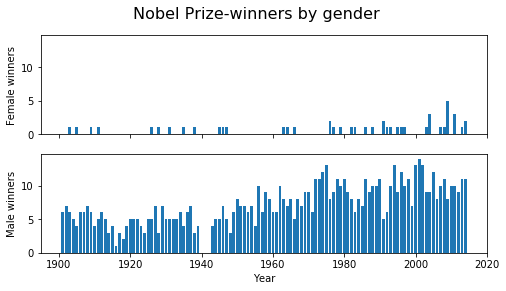

In [21]:
new_index = pd.Index(np.arange(1901, 2015), name='year')
by_year_gender = df.groupby(['year','gender'])
year_gen_sz = by_year_gender.size().unstack().reindex(new_index)
fig, axes = plt.subplots(nrows=2, ncols=1,
sharex=True, sharey=True)
ax_f = axes[0]
ax_m = axes[1]
fig.suptitle('Nobel Prize-winners by gender', fontsize=16)
ax_f.bar(year_gen_sz.index, year_gen_sz.female)
ax_f.set_ylabel('Female winners')
ax_m.bar(year_gen_sz.index, year_gen_sz.male)
ax_m.set_ylabel('Male winners')
ax_m.set_xlabel('Year')

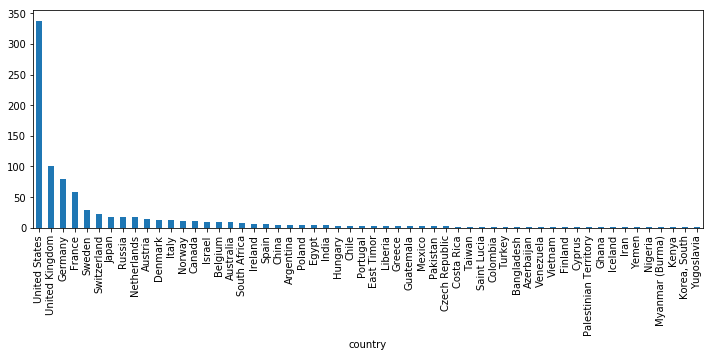

In [22]:
df.groupby('country').size().sort_values(ascending=False)\
.plot(kind='bar', figsize=(12,4))

In [23]:
nat_group = df.groupby('country')
ngsz = nat_group.size()
ngsz.index

Index(['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belgium', 'Canada', 'Chile', 'China', 'Colombia', 'Costa Rica',
       'Cyprus', 'Czech Republic', 'Denmark', 'East Timor', 'Egypt', 'Finland',
       'France', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hungary',
       'Iceland', 'India', 'Iran', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kenya', 'Korea, South', 'Liberia', 'Mexico', 'Myanmar (Burma)',
       'Netherlands', 'Nigeria', 'Norway', 'Pakistan', 'Palestinian Territory',
       'Poland', 'Portugal', 'Russia', 'Saint Lucia', 'South Africa', 'Spain',
       'Sweden', 'Switzerland', 'Taiwan', 'Turkey', 'United Kingdom',
       'United States', 'Venezuela', 'Vietnam', 'Yemen', 'Yugoslavia'],
      dtype='object', name='country')

In [24]:
df_countries = pd.read_json('D:/Praxis Class Materials/Term 3/Data Visualization/Project/winning_country_data.json', orient='index')

In [25]:
df_countries.ix[0]

C:\Users\NAYAn\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


alpha3Code               ARG
area              2.7804e+06
capital         Buenos Aires
gini                    44.5
latlng        [-34.0, -64.0]
name               Argentina
population          42669500
Name: Argentina, dtype: object

In [26]:
df_countries = df_countries.set_index('name')
df_countries['nobel_wins'] = ngsz
df_countries['nobel_wins_per_capita'] =\
df_countries.nobel_wins / df_countries.population

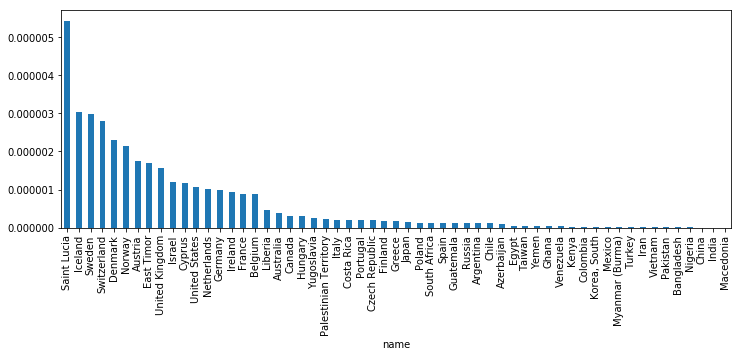

In [27]:
df_countries.sort_values(by='nobel_wins_per_capita', ascending=False)\
.nobel_wins_per_capita.plot(kind='bar', figsize=(12,4))

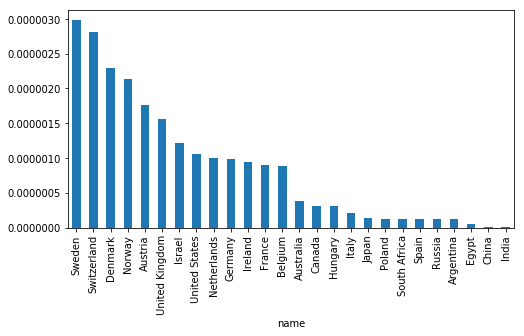

In [28]:

# filter for countries with more than two Nobel prizes
df_countries[df_countries.nobel_wins > 2]\
.sort_values(by='nobel_wins_per_capita', ascending=False)\
.nobel_wins_per_capita.plot(kind='bar')

In [29]:
nat_cat_sz = df.groupby(['country', 'category']).size().unstack()
nat_cat_sz[:5] # take the first five countries by category

category,Chemistry,Economics,Literature,Peace,Physics,Physiology or Medicine
country,,,,,,
Argentina,1.0,NaN,NaN,2.0,NaN,2.0
Australia,NaN,1.0,1.0,NaN,1.0,6.0
Austria,3.0,1.0,1.0,2.0,4.0,4.0
Azerbaijan,NaN,NaN,NaN,NaN,1.0,NaN
Bangladesh,NaN,NaN,NaN,1.0,NaN,NaN


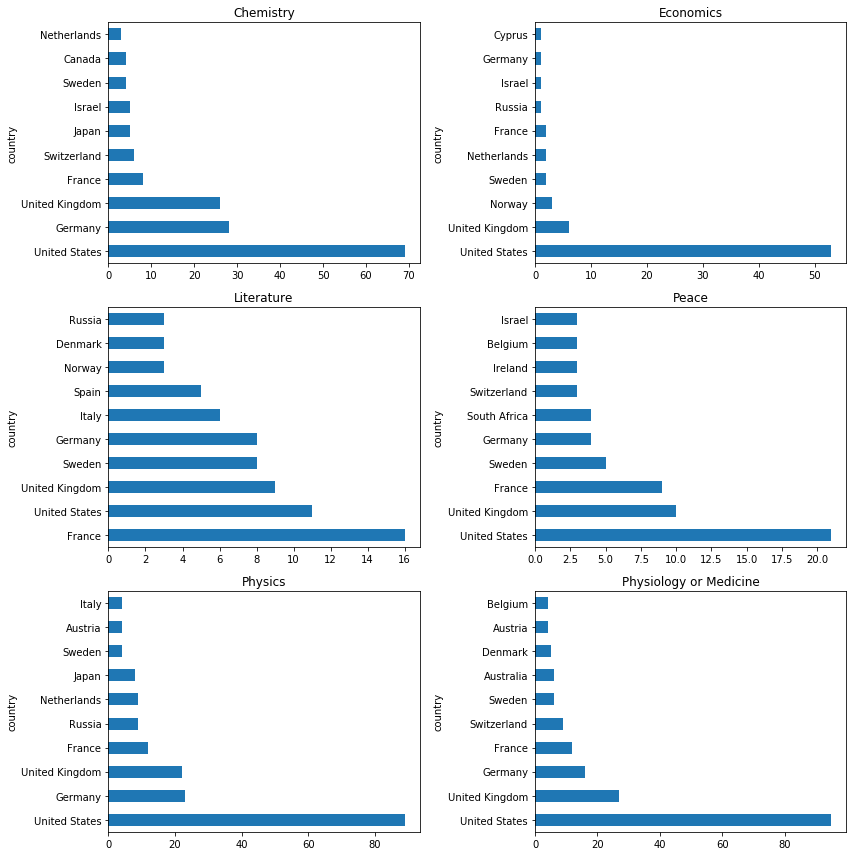

In [31]:
COL_NUM = 2
ROW_NUM = 3
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(12,12))
for i, (label, col) in enumerate(nat_cat_sz.iteritems()):
    ax = axes[i//COL_NUM, i%COL_NUM]
    col = col.sort_values(ascending=False)[:10]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
plt.tight_layout()

In [32]:
# increase the font size 
plt.rcParams['font.size'] = 20

In [33]:
new_index = pd.Index(np.arange(1901, 2015), name='year')
by_year_nat_sz = df.groupby(['year', 'country'])\
.size().unstack().reindex(new_index)

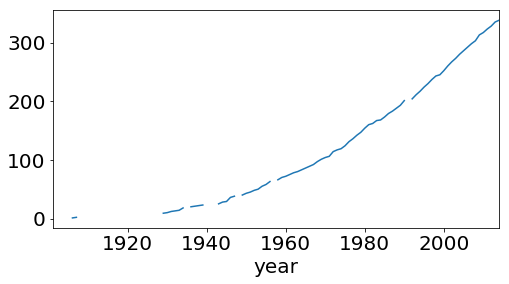

In [34]:
by_year_nat_sz['United States'].cumsum().plot()

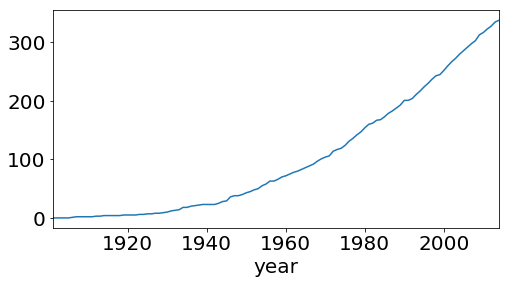

In [35]:

by_year_nat_sz['United States'].fillna(0).cumsum().plot()

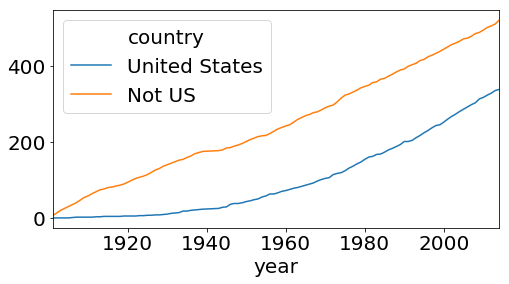

In [36]:

by_year_nat_sz = df.groupby(['year', 'country']).size().unstack().fillna(0)
not_US = by_year_nat_sz.columns.tolist()
not_US.remove('United States')
by_year_nat_sz['Not US'] = by_year_nat_sz[not_US].sum(axis=1)
ax = by_year_nat_sz[['United States', 'Not US']].cumsum().plot()

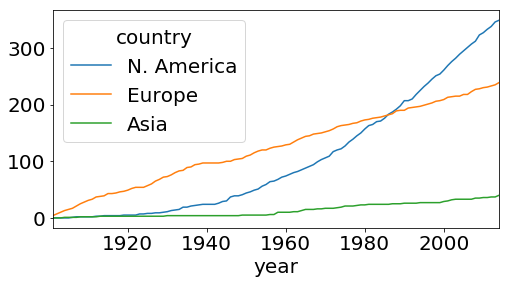

In [37]:
by_year_nat_sz = df.groupby(['year', 'country'])\
.size().unstack().reindex(new_index).fillna(0)

regions = [
{'label':'N. America',
'countries':['United States', 'Canada']},
{'label':'Europe',
'countries':['United Kingdom', 'Germany', 'France']},
{'label':'Asia',
'countries':['Japan', 'Russia', 'India']}
]

for region in regions:
    by_year_nat_sz[region['label']] =\
    by_year_nat_sz[region['countries']].sum(axis=1)
    
by_year_nat_sz[[r['label'] for r in regions]].cumsum().plot()

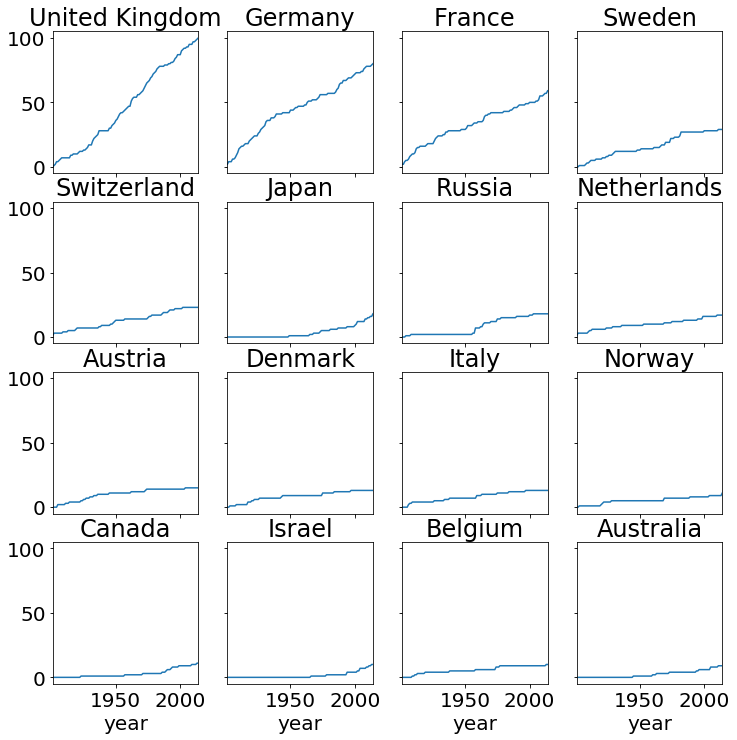

In [39]:
COL_NUM = 4 
ROW_NUM = 4

by_nat_sz = df.groupby('country').size()
by_nat_sz.sort_values(ascending=False, inplace=True)
fig, axes = plt.subplots(COL_NUM, ROW_NUM,\
sharex=True, sharey=True,
figsize=(12,12))
for i, nat in enumerate(by_nat_sz.index[1:17]):
    ax = axes[i//COL_NUM, i%ROW_NUM]
    by_year_nat_sz[nat].cumsum().plot(ax=ax)
    ax.set_title(nat)

In [41]:
import seaborn as sns

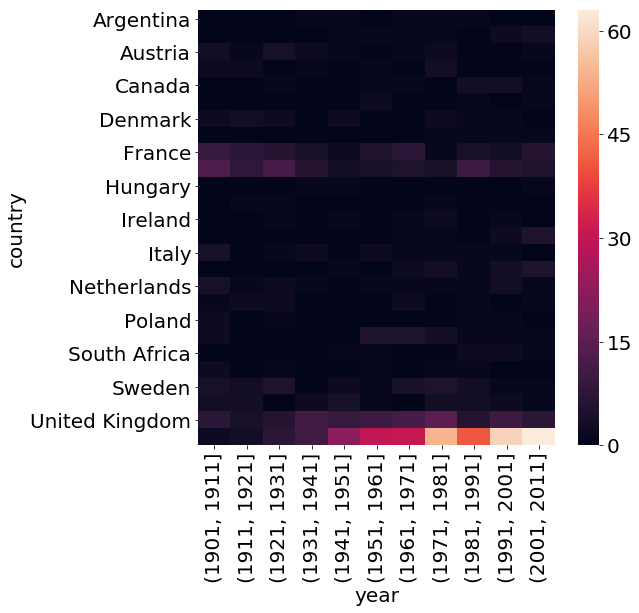

In [42]:
bins = np.arange(df.year.min(), df.year.max(), 10)
by_year_nat_binned = df.groupby(
['country', pd.cut(df.year, bins, precision=0)]).size().unstack().fillna(0)
plt.figure(figsize=(8,8))
sns.heatmap(by_year_nat_binned[by_year_nat_binned.sum(axis=1) > 2])

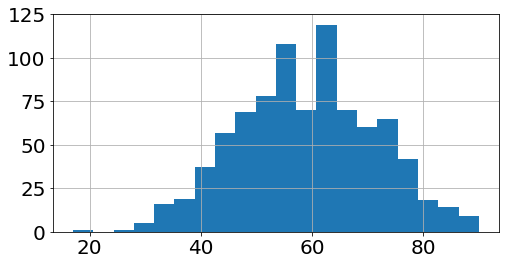

In [43]:
df['award_age'].hist(bins=20)

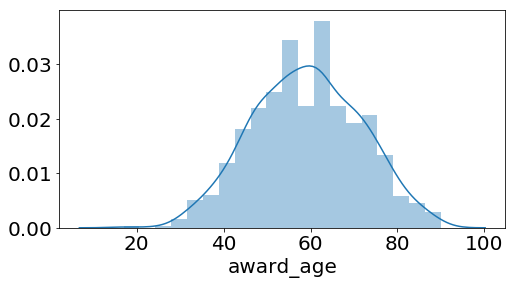

In [44]:
sns.distplot(df['award_age'])

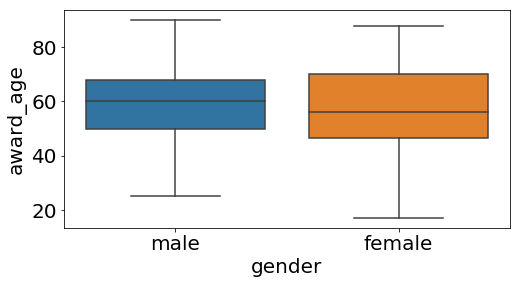

In [45]:
sns.boxplot(df.gender, df.award_age)

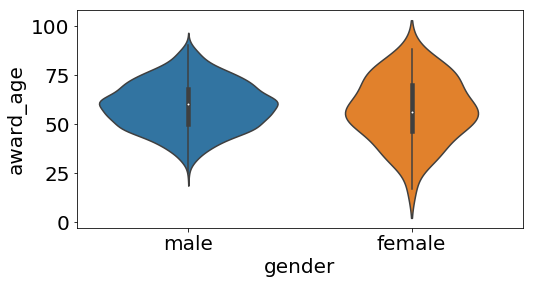

In [46]:
sns.violinplot(df.gender, df.award_age)

In [47]:
df['age_at_death'] = (df.date_of_death - df.date_of_birth)\
.dt.days/365

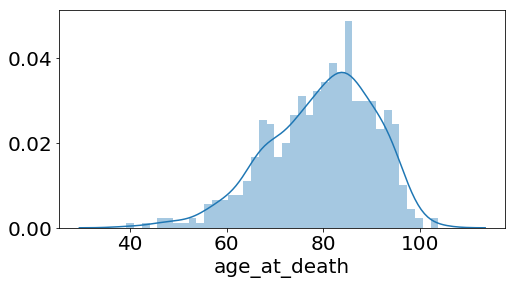

In [48]:
age_at_death = df[df.age_at_death.notnull()].age_at_death
sns.distplot(age_at_death, bins=40)

In [49]:
df[df.age_at_death > 100][['name', 'category', 'year']]

,name,category,year
101,Ronald Coase,Economics,1991
329,Rita Levi-Montalcini,Physiology or Medicine,1986


In [50]:
df_temp = df[df.age_at_death.notnull()]

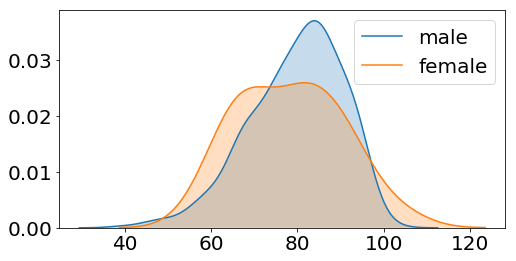

In [51]:
sns.kdeplot(df_temp[(df_temp.gender == 'male')].age_at_death, shade=True, label='male')
sns.kdeplot(df_temp[(df_temp.gender == 'female')].age_at_death, shade=True, label='female')
plt.legend()

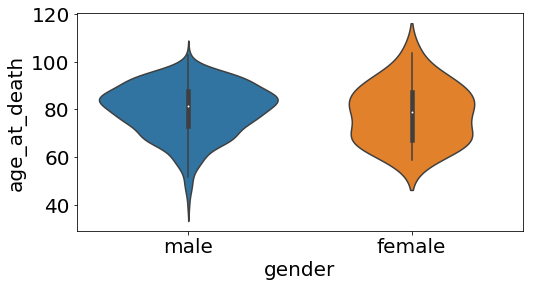

In [52]:
sns.violinplot(df.gender, age_at_death)

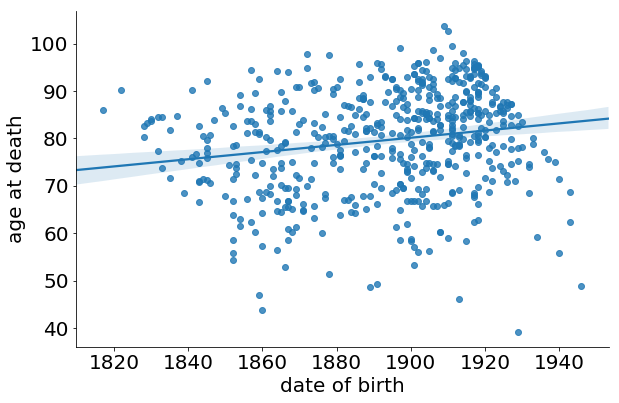

In [53]:

df_temp=df[df.age_at_death.notnull()]
data = pd.DataFrame(
{'age at death':df_temp.age_at_death,
'date of birth':df_temp.date_of_birth.dt.year})
sns.lmplot('date of birth', 'age at death', data, size=6, aspect=1.5)

In [54]:

df = pd.read_json('D:/Praxis Class Materials/Term 3/Data Visualization/Project/nobel_winners_plus_bornin.json', orient='records')

Text(0.5,1,'The Nobel Diaspora')

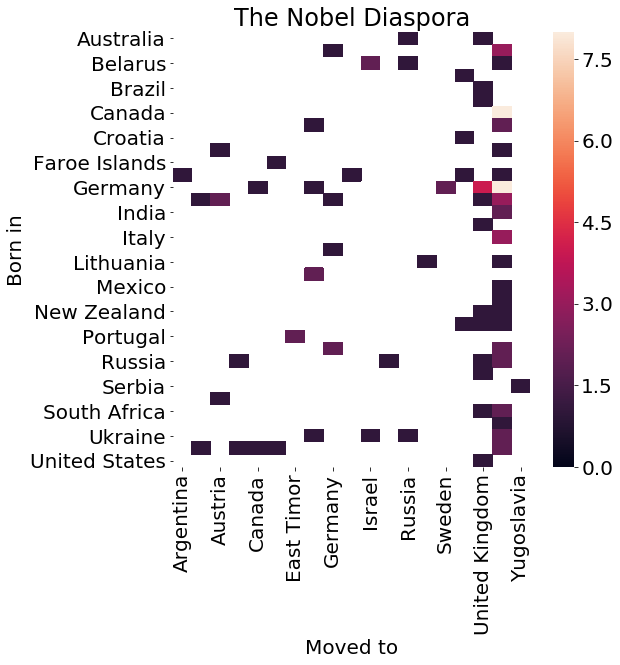

In [55]:
by_bornin_nat = df[df.born_in.notnull()].groupby(\
['born_in', 'country']).size().unstack()
by_bornin_nat.index.name = 'Born in'
by_bornin_nat.columns.name = 'Moved to'
plt.figure(figsize=(8,8))
ax = sns.heatmap(by_bornin_nat, vmin=0, vmax=8)
ax.set_title('The Nobel Diaspora')

In [56]:
df.date_of_birth = pd.to_datetime(df.date_of_birth).dt.date

In [57]:
df[(df.born_in == 'Germany') & (df.country == 'United Kingdom')][['name', 'date_of_birth', 'category']]

,name,date_of_birth,category
119,Ernst Boris Chain,1906-06-19,Physiology or Medicine
484,Hans Adolf Krebs,1900-08-25,Physiology or Medicine
486,Max Born,1882-12-11,Physics
503,Bernard Katz,1911-03-26,Physiology or Medicine
